In [95]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
df = pd.read_csv('.duct/logs/summary.csv')
df

,exit_code,command,logs_prefix,wall_clock_time,peak_rss,average_rss,peak_vsz,average_vsz,peak_pmem,average_pmem,peak_pcpu,average_pcpu,num_samples,num_reports,start_time,end_time,method,dataset,threads,dataset_size
0,0,python benchmark.py --method=harpy --dataset=/...,.duct/logs/2025.02.27T00.00.53-2676018_,25.215789,1753567232,9.958222e+08,5288415232,3.155738e+09,0.4,0.195833,237.2,130.729167,48,26,1.740611e+09,1.740611e+09,harpy,/srv/scratch/benjaminr/harpy_figures/data/data...,1,100
1,0,python benchmark.py --method=harpy --dataset=/...,.duct/logs/2025.02.27T00.01.19-2676330_,26.057473,1780641792,1.040402e+09,5308436480,3.283269e+09,0.4,0.206000,201.5,123.680000,50,27,1.740611e+09,1.740611e+09,harpy,/srv/scratch/benjaminr/harpy_figures/data/data...,1,500
2,0,python benchmark.py --method=harpy --dataset=/...,.duct/logs/2025.02.27T00.01.45-2676500_,28.804053,1938788352,1.106293e+09,5482807296,3.441056e+09,0.4,0.221818,233.8,125.838182,55,30,1.740611e+09,1.740611e+09,harpy,/srv/scratch/benjaminr/harpy_figures/data/data...,1,1000
3,0,python benchmark.py --method=sopa --dataset=/s...,.duct/logs/2025.02.27T00.02.44-2676834_,15.024819,1242284032,6.922058e+08,37438210048,1.153948e+10,0.3,0.151724,271.0,163.517241,29,16,1.740611e+09,1.740611e+09,sopa,/srv/scratch/benjaminr/harpy_figures/data/data...,1,100
4,0,python benchmark.py --method=sopa --dataset=/s...,.duct/logs/2025.02.27T00.02.59-2676999_,26.969316,1733414912,1.041200e+09,39825547264,2.491285e+10,0.4,0.236000,864.0,439.660000,50,28,1.740611e+09,1.740611e+09,sopa,/srv/scratch/benjaminr/harpy_figures/data/data...,1,500
5,0,python benchmark.py --method=sopa_dask --datas...,.duct/logs/2025.02.27T00.03.57-2677445_,22.758298,1212170240,7.326218e+08,37422018560,1.374894e+10,0.3,0.153659,256.0,139.439024,41,24,1.740611e+09,1.740611e+09,sopa_dask,/srv/scratch/benjaminr/harpy_figures/data/data...,1,100
6,0,python benchmark.py --method=sopa_dask --datas...,.duct/logs/2025.02.27T00.04.20-2677622_,27.322484,1594961920,1.008150e+09,39789109248,2.445730e+10,0.4,0.225490,832.0,401.980392,51,29,1.740611e+09,1.740611e+09,sopa_dask,/srv/scratch/benjaminr/harpy_figures/data/data...,1,500


## Wall clock time

In [97]:
# sns.lineplot(data=df, x="config_duration", y="wall_clock_time", err_style="bars", errorbar=("se", 2), marker='o')

In [98]:
def extrapolated_y(axs):
    from copy import deepcopy
    # add grey extrapolation lines for missing points
    axs = deepcopy(axs)
    unique_xs = {x for line in axs.lines for x in line.get_xdata() }
    for line in axs.lines:
        xs, ys = line.get_data()
        missing_xs = unique_xs - set(xs)
        # plot extrapolation lines between last xs and missing xs
        if len(xs) >= 2:
            last_x = xs[-1]
            for missing_x in missing_xs:
                # calculate extrapolated y by linear extrapolation from last two points
                last_y = ys[-1]
                second_last_x = xs[-2]
                second_last_y = ys[-2]
                slope = (last_y - second_last_y) / (last_x - second_last_x)
                extrapolated_y = last_y + slope * (missing_x - last_x)
                # plot extrapolation line with same style as original line, make the shade lighter
                axs.plot([last_x, missing_x], [last_y, extrapolated_y], color=line.get_color(), linestyle=line.get_linestyle(), alpha=0.3)
    return axs

<Axes: xlabel='dataset_size', ylabel='wall_clock_time'>

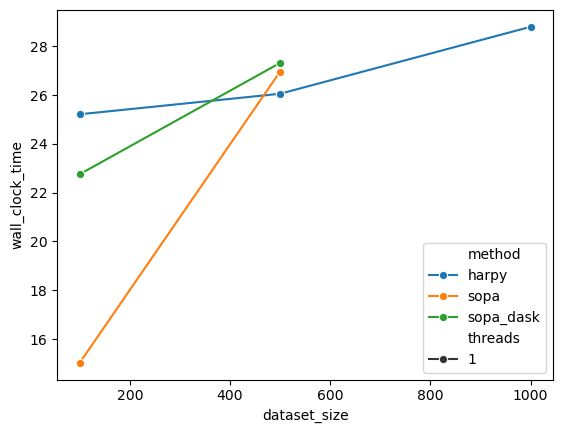

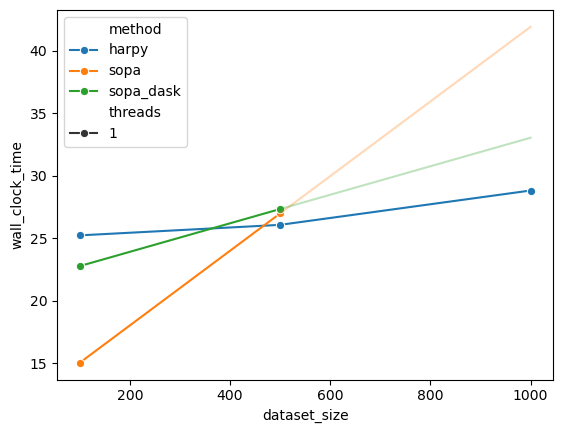

In [99]:
axs = sns.lineplot(data=df, x="dataset_size", y="wall_clock_time", hue="method", err_style="bars", errorbar=("se", 2), marker='o', style='threads')
extrapolated_y(axs)

<Axes: xlabel='dataset_size', ylabel='peak_rss'>

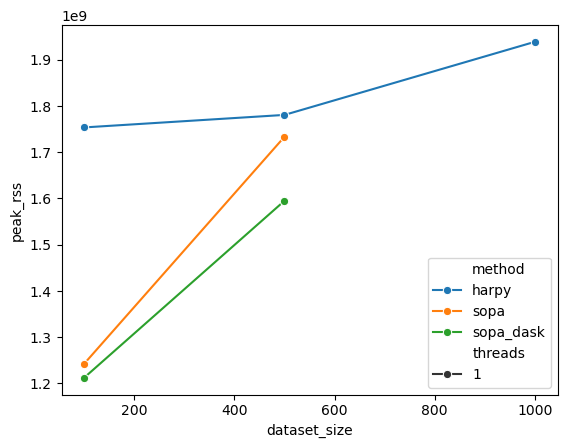

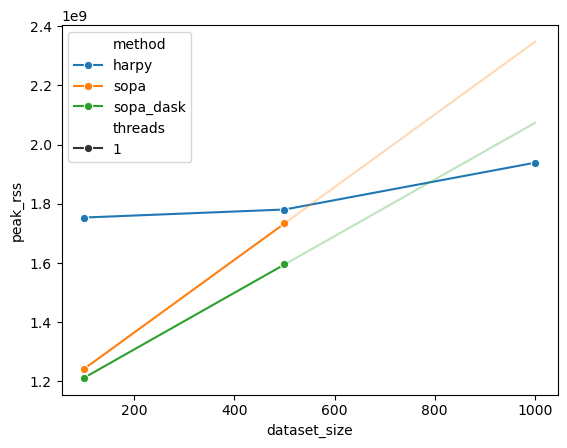

In [100]:
axs = sns.lineplot(data=df, x="dataset_size", y="peak_rss", hue="method", err_style="bars", errorbar=("se", 2), marker='o', style='threads')
extrapolated_y(axs)